

# <font color=blue>Project: Why no show?</font>
>**Author** *Rajdeep SHIL*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#Cleaning"> Cleaning the data</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.
> 
>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [45]:
#Importing the dataset for noshow medical appointment data of brazil 2016
data=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [46]:
# Inspecting the data for its variable
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [47]:
data.shape

(110527, 14)

<a id='Cleaning'></a>
## Cleaning the Data 
> Checks are done to the dataset to see if any null values or missing values are encountred in the variables. Some of the reduntent data, like patient identification(PatientID) and Appointment number(AppointmentID) can be dropped directly as they are very specific and won't help in drawing any conclusions.
>
>As you can see from the cell below, data apears to be clear and there are no null values/missing value encountred for this specific dataset

In [48]:
# Checking overall fill values/non-missing values of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [49]:
#Dropping patient ID and Appointment ID from the data
data.drop(['PatientId', 'AppointmentID'],axis=1,inplace=True)
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [50]:
# Get the trends for different variables
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### **Gender and No appointment**
It would be interesting to see based on gender, what is the distribution of no-show appointment. Fist we would try to see only the impact of gender, then we can include more paramters like Age, whether they had Scholarship or not, what ailment they were facing, etc. 

In this no_show variable is representing the people who did not show up, hence '**No-show**' is equal to '**Yes**' from the dataset.

In [51]:
Males=data['Gender']=='M'
Females=data['Gender']=='F'
no_show=data['No-show']=='Yes'
per_male_no_show= (data[Males & no_show]['Gender'].count())/(data[Males]['Gender'].count())*100
per_female_no_show= (data[Females & no_show]['Gender'].count())/(data[Females]['Gender'].count())*100

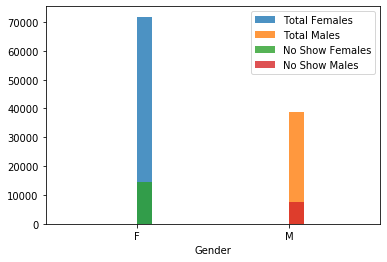

In [62]:
# Comparing female and male patients
plt.hist(data[Females]['Gender'],  alpha=0.8, label='Total Females')
plt.hist(data[Males]['Gender'],  alpha=0.8, label='Total Males')
plt.hist(data[no_show & Females]['Gender'],  alpha=0.8, label='No Show Females')
plt.hist(data[no_show & Males]['Gender'],  alpha=0.8, label='No Show Males')
plt.xlabel('Gender')
plt.legend()

In [52]:
print ('Percentage of males that did not show up for scheduled appointment =', per_male_no_show)
print ('Percentage of females that did not show up for scheduled appointment =', per_female_no_show)

Percentage of males that did not show up for scheduled appointment = 19.967947889471915
Percentage of females that did not show up for scheduled appointment = 20.31458797327394


### No show after receiving SMS reminder
It would be interesting to know how many people received SMS and still did not show up.

In [73]:
sms_received=noshow['SMS_received']==True
data[sms_received]['SMS_received'].count()
data[no_show & sms_received ]['SMS_received'].count()
per_sms_no_show=(data[no_show & sms_received ]['SMS_received'].count())/(data[sms_received ]['SMS_received'].count())*100

In [74]:
print ('Percentage of People that did not show up after receiving SMS reminder =', per_sms_no_show)

Percentage of People that did not show up after receiving SMS reminder = 27.574544839637


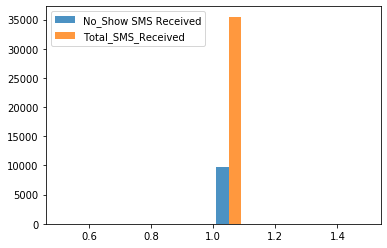

In [82]:
plt.hist([data[no_show & sms_received ]['SMS_received'], data[sms_received ]['SMS_received']], alpha=0.8,label=['No_Show SMS Received','Total_SMS_Received'])
plt.legend()

An interesting thing we could look at is what kind of illness are prone to people based on gender and age group. After we find a correlation, we could assess its effect on no-show appointment  scenario. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [ ]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

In [ ]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### Research Question 2  (Replace this header name!)

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!